## Panasonic SOC Prediction - Cycle Analysis
Panasonic 18650PF Li-ion Battery Data - https://data.mendeley.com/datasets/wykht8y7tg/1

Kollmeyer, Phillip (2018), “Panasonic 18650PF Li-ion Battery Data”, Mendeley Data, V1, doi: 10.17632/wykht8y7tg.1

In [21]:
import os
import sys
import IPython
import IPython.display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import collections
from datetime import datetime, timedelta

cell_type = "panasonic"
model_type = ""
base_path = '../../'

sys.path.append(base_path)
from training import utils

panasonic_data_path = base_path + 'datasets/Panasonic_18650PF'
lg_data_path = base_path + 'datasets/LG_18650HG2'
pre_trained_path = base_path + 'pre-trained/' + cell_type + '_' + model_type

resample_1hz = True
vi_averages = True

## Panasonic Test, Train Processing

In [70]:
discharge_cycle = ['UDDS']

panasonic_n10_temps = ['n10degC']
panasonic_n10_discharge_cycles = discharge_cycle

panasonic_0_temps = ['0degC']
panasonic_0_discharge_cycles = discharge_cycle

panasonic_10_temps = ['10degC']
panasonic_10_discharge_cycles = discharge_cycle

panasonic_25_temps = ['25degC']
panasonic_25_discharge_cycles = discharge_cycle

panasonic_n10_files = utils.panasonic_get_files(panasonic_data_path,
                                                  panasonic_n10_discharge_cycles, 
                                                  panasonic_n10_temps)

panasonic_0_files = utils.panasonic_get_files(panasonic_data_path,
                                                  panasonic_0_discharge_cycles, 
                                                  panasonic_0_temps)

panasonic_10_files = utils.panasonic_get_files(panasonic_data_path,
                                                  panasonic_10_discharge_cycles, 
                                                  panasonic_10_temps)

panasonic_25_files = utils.panasonic_get_files(panasonic_data_path,
                                                  panasonic_25_discharge_cycles, 
                                                  panasonic_25_temps)



for file in panasonic_n10_files:
    if "UDDS_LA92" in file or "LA92_NN" in file:
        panasonic_n10_files.remove(file)

for file in panasonic_0_files:
    if "UDDS_LA92" in file or "LA92_NN" in file:
        panasonic_0_files.remove(file)
        
for file in panasonic_10_files:
    if "UDDS_LA92" in file or "LA92_NN" in file:
        panasonic_10_files.remove(file)
        
for file in panasonic_25_files:
    if "UDDS_LA92" in file or "LA92_NN" in file:
        panasonic_25_files.remove(file)


panasonic_n10, panasonic_n10_norm = utils.panasonic_create_dataset(panasonic_n10_files,
                                                                       panasonic_n10_discharge_cycles, 
                                                                       vi_averages, 
                                                                       resample_1hz)

panasonic_0, panasonic_0_norm = utils.panasonic_create_dataset(panasonic_0_files, 
                                                                     panasonic_0_discharge_cycles, 
                                                                     vi_averages, 
                                                                     resample_1hz)

panasonic_10, panasonic_10_norm = utils.panasonic_create_dataset(panasonic_10_files,
                                                                       panasonic_10_discharge_cycles, 
                                                                       vi_averages, 
                                                                       resample_1hz)

panasonic_25, panasonic_25_norm = utils.panasonic_create_dataset(panasonic_25_files,
                                                                       panasonic_25_discharge_cycles, 
                                                                       vi_averages, 
                                                                       resample_1hz)

../../datasets/Panasonic_18650PF/n10degC/Drive Cycles/06-07-17_08.39 n10degC_UDDS_Pan18650PF.csv 109717
../../datasets/Panasonic_18650PF/0degC/Drive cycles/06-02-17_17.14 0degC_UDDS_Pan18650PF.csv 128522
../../datasets/Panasonic_18650PF/10degC/Drive Cycles/03-27-17_09.06 10degC_UDDS_Pan18650PF.csv 210465
../../datasets/Panasonic_18650PF/25degC/Drive cycles/03-21-17_00.29 25degC_UDDS_Pan18650PF.csv 224187


## Panasonic Dataset Figures, Distribution

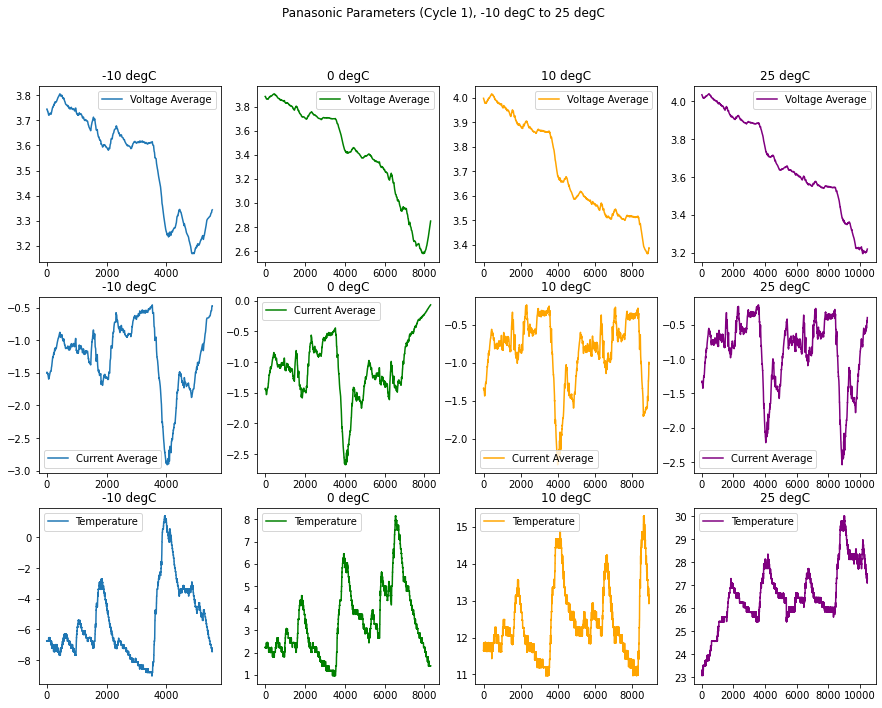

In [69]:
plot_cols = ['Voltage Average', 'Current Average', 'Temperature']

fig, axs = plt.subplots(nrows=len(plot_cols), ncols=4, figsize=(15, 11))
fig.suptitle("Panasonic Parameters (Cycle 1), -10 degC to 25 degC")

for i, col in enumerate(plot_cols):
    axs[i, 0].plot(panasonic_n10[col], label=f'{col}')
    axs[i, 0].set_title(f'-10 degC')
    axs[i, 0].legend()
    
    axs[i, 1].plot(panasonic_0[col], label=f'{col}', color="green")
    axs[i, 1].set_title(f'0 degC')
    axs[i, 1].legend()
    
    axs[i, 2].plot(panasonic_10[col], label=f'{col}', color="orange")
    axs[i, 2].set_title(f'10 degC')
    axs[i, 2].legend()
    
    axs[i, 3].plot(panasonic_25[col], label=f'{col}', color="purple")
    axs[i, 3].set_title(f'25 degC')
    axs[i, 3].legend()


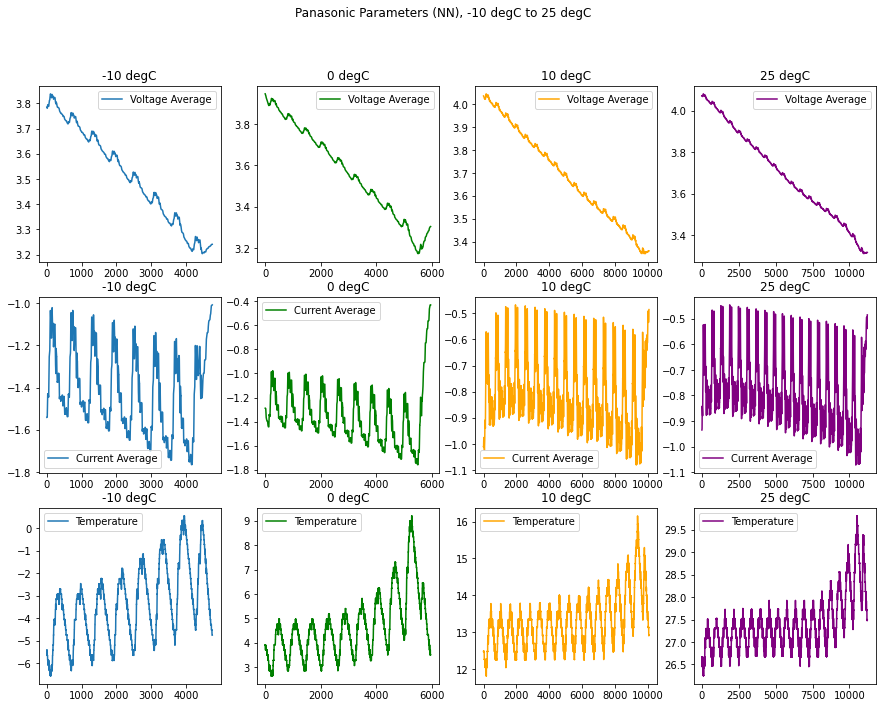

In [67]:
plot_cols = ['Voltage Average', 'Current Average', 'Temperature']

fig, axs = plt.subplots(nrows=len(plot_cols), ncols=4, figsize=(15, 11))
fig.suptitle("Panasonic Parameters (NN), -10 degC to 25 degC")

for i, col in enumerate(plot_cols):
    axs[i, 0].plot(panasonic_n10[col], label=f'{col}')
    axs[i, 0].set_title(f'-10 degC')
    axs[i, 0].legend()
    
    axs[i, 1].plot(panasonic_0[col], label=f'{col}', color="green")
    axs[i, 1].set_title(f'0 degC')
    axs[i, 1].legend()
    
    axs[i, 2].plot(panasonic_10[col], label=f'{col}', color="orange")
    axs[i, 2].set_title(f'10 degC')
    axs[i, 2].legend()
    
    axs[i, 3].plot(panasonic_25[col], label=f'{col}', color="purple")
    axs[i, 3].set_title(f'25 degC')
    axs[i, 3].legend()


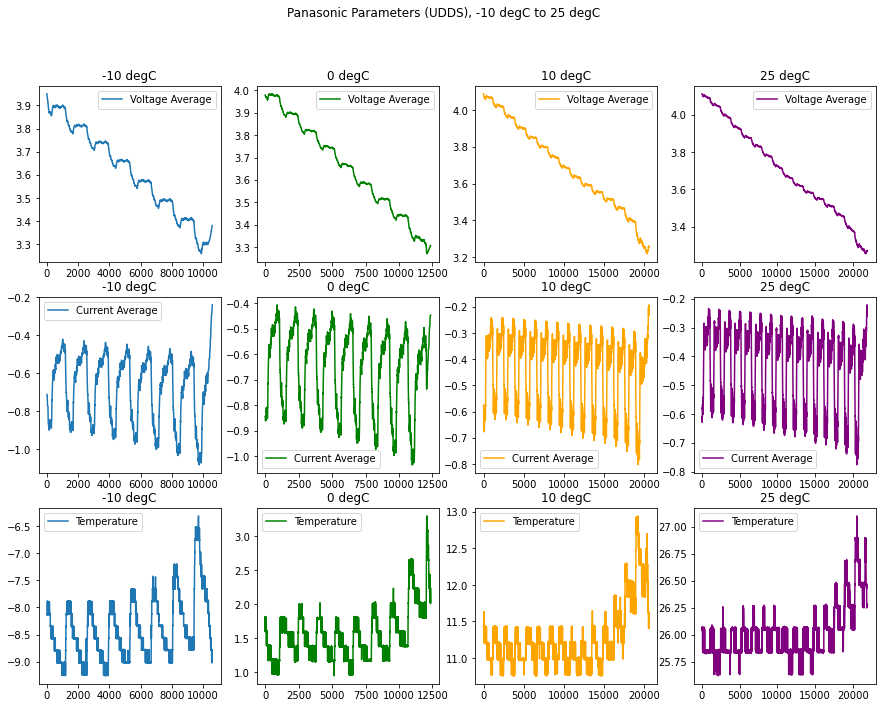

In [71]:
plot_cols = ['Voltage Average', 'Current Average', 'Temperature']

fig, axs = plt.subplots(nrows=len(plot_cols), ncols=4, figsize=(15, 11))
fig.suptitle("Panasonic Parameters (UDDS), -10 degC to 25 degC")

for i, col in enumerate(plot_cols):
    axs[i, 0].plot(panasonic_n10[col], label=f'{col}')
    axs[i, 0].set_title(f'-10 degC')
    axs[i, 0].legend()
    
    axs[i, 1].plot(panasonic_0[col], label=f'{col}', color="green")
    axs[i, 1].set_title(f'0 degC')
    axs[i, 1].legend()
    
    axs[i, 2].plot(panasonic_10[col], label=f'{col}', color="orange")
    axs[i, 2].set_title(f'10 degC')
    axs[i, 2].legend()
    
    axs[i, 3].plot(panasonic_25[col], label=f'{col}', color="purple")
    axs[i, 3].set_title(f'25 degC')
    axs[i, 3].legend()
